**데이터 셋**

* 파일 포맷: CSV
* 샘플 수: 55,809건
* feature 수: 22개
    * 1: os 타입
    * 2: 국가
    * 3: 로그인 타입
    * 4: D+1일차 접속여부
    * 5: D+3일차 접속여부
    * 6: D+5일차 접속여부
    * 7: D+7일차 접속여부
    * 8: D+9일차 접속여부
    * 9: D+11일차 접속여부
    * 10: D+14일차 접속여부
    * 11: 최종 클리어 스테이지
    * 12: 마지막으로 도전한 스테이지
    * 13: 획득한 불꽃 총 개수
    * 14: 사용한 불꽃 총 개수
    * 15: 코인 교환에 사용한 루비량
    * 16: 버디 슬롯 개방에 사용한 루비량
    * 17: 에피소드 오픈에 사용한 루비량
    * 18: 불꽃 충전에 사용한 루비량
    * 19: 버디 뽑기(가챠)에 사용한 루비량
    * 20: 스테이지 플레이에 필요한 아이템 구매에 사용한 루비량
    * 21: 구매한 상품명
    * 22: 구매 횟수
    

In [1]:
# import를 활용해 필요한 라이브러리 읽어오기
import pandas as pd
import numpy as np

#시각화 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 그래프 시각화 옵션 
%matplotlib inline

# 그래프의 한글 폰트를 설정 
mpl.rc('font', family = "Malgun Gothic") #맑은 고딕 설정 

#그래프의 한글을 더욱 선명하게 출력 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수값이 나올때, 깨지는 현상 방지 
mpl.rc('axes', unicode_minus = False)

# 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 늘려줍니다.
pd.options.display.max_columns = 100

C:\Users\world\AppData\Local\Temp/ipykernel_26480/2731115443.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [3]:
Name=['os 타입','국가','로그인 타입','D+1일차 접속여부','D+3일차 접속여부',
      'D+5일차 접속여부','D+7일차 접속여부','D+9일차 접속여부','D+11일차 접속여부',
      'D+14일차 접속여부','최종 클리어 스테이지','마지막으로 도전한 스테이지',
      '획득한 불꽃 총 개수','사용한 불꽃 총 개수','코인 교환에 사용한 루비량',
      '버디 슬롯 개방에 사용한 루비량','에피소드 오픈에 사용한 루비량',
      '불꽃 충전에 사용한 루비량','버디 뽑기(가챠)에 사용한 루비량',
      '스테이지 플레이에 필요한 아이템 구매에 사용한 루비량','구매한 상품명','구매 횟수']

In [4]:
# 데이터 로딩
# 알맞은 경로를 지정해주세요
# 알맞은 경로를 지정해주세요
data = pd.read_csv("line_studio_nru_data.csv", sep=",", names=Name)

# data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(data.shape)

# head()로 data 데이터의 상위 5개를 띄웁니다.
data.head()

(55809, 22)


,os 타입,국가,로그인 타입,D+1일차 접속여부,D+3일차 접속여부,D+5일차 접속여부,D+7일차 접속여부,D+9일차 접속여부,D+11일차 접속여부,D+14일차 접속여부,최종 클리어 스테이지,마지막으로 도전한 스테이지,획득한 불꽃 총 개수,사용한 불꽃 총 개수,코인 교환에 사용한 루비량,버디 슬롯 개방에 사용한 루비량,에피소드 오픈에 사용한 루비량,불꽃 충전에 사용한 루비량,버디 뽑기(가챠)에 사용한 루비량,스테이지 플레이에 필요한 아이템 구매에 사용한 루비량,구매한 상품명,구매 횟수
0,Android,JP,LINE,0,0,0,0,0,0,0,29.0,30,41,41,0,0,0,0,0,32,NaN,NaN
1,Android,TH,LINE,1,0,0,0,0,0,0,7.0,7,12,8,0,0,0,0,0,0,NaN,NaN
2,iOS,TW,LINE,1,1,1,1,1,1,1,12.0,13,17,17,0,0,0,0,0,6,NaN,NaN
3,iOS,TW,LINE,0,0,0,0,0,0,0,NaN,0,5,0,0,0,0,0,0,0,NaN,NaN
4,iOS,TW,LINE,0,0,0,0,0,0,0,10.0,0,0,0,0,0,0,0,0,0,NaN,NaN


## 신규유저 기본 지표 분석

우리 게임에 들어온 신규유저를 볼 때 가장 관심이 있는 지표는 **"잔존율"** 이라고 할 수 있습니다. 잔존율이란 신규 유저중 다음날, 그 다음날, 2주뒤, 1개월 뒤에도 우리 게임에 접속하였는지를 측정하는 지표이며, 리텐션(Retention)이라고도 합니다. 전체 가입 유저 중 D+N일차 이후에도 접속한 유저의 비율로 계산 가능합니다.


**필요한 컬럼**
* 1: os 타입
* 4: D+1일차 접속여부
* 5: D+3일차 접속여부
* 6: D+5일차 접속여부
* 7: D+7일차 접속여부
* 8: D+9일차 접속여부
* 9: D+11일차 접속여부
* 10: D+14일차 접속여부
* 11: 최종 클리어 스테이지

    

**1. 신규유저의 D+1, 3, 5, 7, 9, 11, 14 잔존율(Retention)을 계산해주세요.**

(잔존율 = D+N 잔존유저수 / 전체 가입유저수)

In [6]:
connectin_status = ['D+1일차 접속여부','D+3일차 접속여부',
      'D+5일차 접속여부','D+7일차 접속여부','D+9일차 접속여부','D+11일차 접속여부',
      'D+14일차 접속여부']

data[connectin_status]

,D+1일차 접속여부,D+3일차 접속여부,D+5일차 접속여부,D+7일차 접속여부,D+9일차 접속여부,D+11일차 접속여부,D+14일차 접속여부
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
55804,1,0,0,0,0,0,0
55805,1,1,0,1,1,1,1
55806,1,1,1,0,0,1,0
55807,1,1,0,0,0,0,0


In [7]:
def func1(x):
    result = x.sum() / len(x)
    return result

data[connectin_status].apply(func1)

D+1일차 접속여부     0.431060
D+3일차 접속여부     0.298196
D+5일차 접속여부     0.257002
D+7일차 접속여부     0.240212
D+9일차 접속여부     0.218155
D+11일차 접속여부    0.205917
D+14일차 접속여부    0.198946
dtype: float64

**2. OS 타입별 신규유저의 D+1, 3, 5, 7, 9, 11, 14 잔존율(Retention)을 계산해주세요.**


In [8]:
data['os 타입'].value_counts()

Android    31830
iOS        23979
Name: os 타입, dtype: int64

In [8]:
data_andro = data.loc[data['os 타입']=='Android']

data_andro[connectin_status].apply(func1).d

D+1일차 접속여부     0.434056
D+3일차 접속여부     0.289915
D+5일차 접속여부     0.242476
D+7일차 접속여부     0.223877
D+9일차 접속여부     0.202451
D+11일차 접속여부    0.190952
D+14일차 접속여부    0.185265
dtype: float64

In [9]:
data_iOS = data.loc[data['os 타입']=='iOS']

data_iOS[connectin_status].apply(func1)

D+1일차 접속여부     0.427082
D+3일차 접속여부     0.309187
D+5일차 접속여부     0.276283
D+7일차 접속여부     0.261896
D+9일차 접속여부     0.239001
D+11일차 접속여부    0.225781
D+14일차 접속여부    0.217107
dtype: float64

이번에는 가입 당일 유저들이 최종적으로 몇 스테이지까지 도달하는지 확인해보려고 합니다. 

**3. 신규유저의 가입 당일 최종 도달 스테이지의 5 number summary를 계산해주세요.**



In [10]:
cond1 = (data['D+1일차 접속여부'] == 1)
data.loc[cond1]['최종 클리어 스테이지'].describe()

count    20752.000000
mean        22.375723
std         28.555554
min          0.000000
25%          8.000000
50%         16.000000
75%         30.000000
max        851.000000
Name: 최종 클리어 스테이지, dtype: float64

**4. 14일까지 잔존한 유저들의 최종 도달 스테이지별 유저 분포를 그래프로 표현해주세요.**

<AxesSubplot:xlabel='최종 클리어 스테이지', ylabel='Count'>

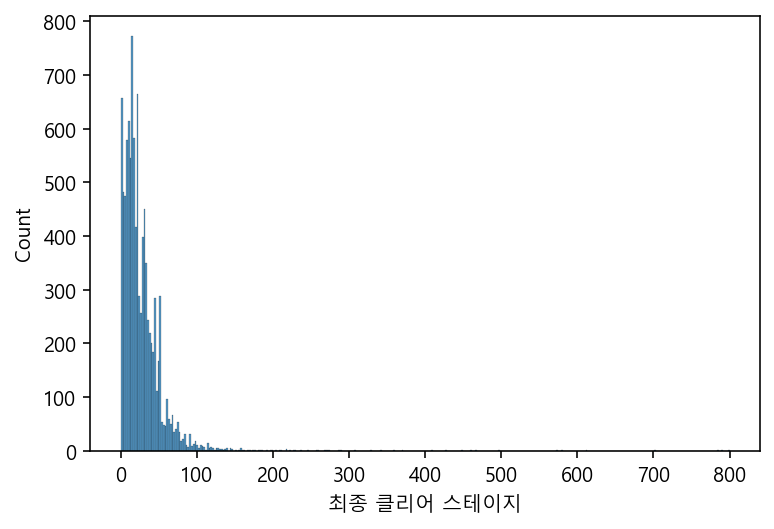

In [11]:
data_14_sol = data.loc[(data['D+14일차 접속여부'] == 1)]
sns.histplot(data = data_14_sol, x = '최종 클리어 스테이지')

**5. 최종 도달 스테이지별 유저수와 비중(%)을 계산해주세요.**

In [12]:
# Nan 값 0으로 처리( 실제 실무에서는 분석 후 적절한 값으로 처리하자)

data['최종 클리어 스테이지(clean)'] = data['최종 클리어 스테이지'].fillna(0)

In [13]:
data['count'] = 1
data_stage = data.pivot_table(index = '최종 클리어 스테이지(clean)', values = 'count', aggfunc = 'sum').reset_index()
data_stage['rate'] = data_stage['count'] / len(data)
data_stage

,최종 클리어 스테이지(clean),count,rate
0,0.0,15842,0.283861
1,1.0,4141,0.074200
2,2.0,1805,0.032342
3,3.0,1592,0.028526
4,4.0,1713,0.030694
...,...,...,...
226,786.0,1,0.000018
227,788.0,1,0.000018
228,790.0,1,0.000018
229,800.0,1,0.000018


<AxesSubplot:xlabel='최종 클리어 스테이지(clean)', ylabel='count'>

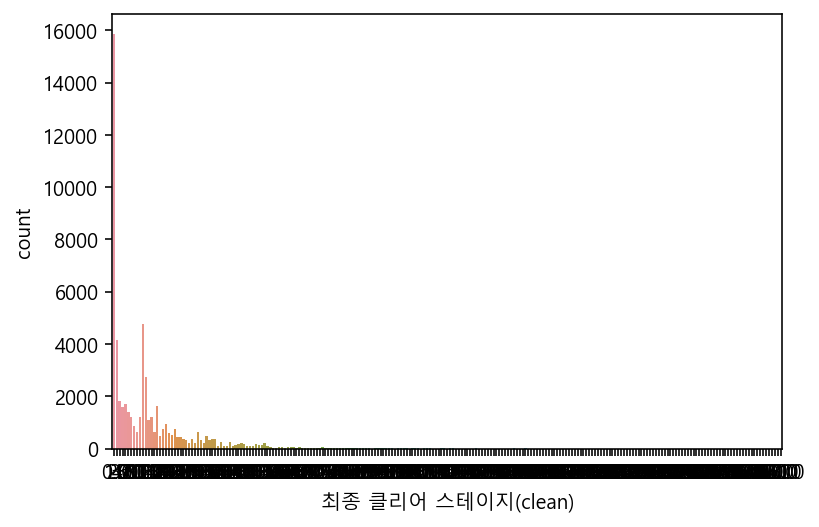

In [14]:
sns.barplot(data = data_stage, x = '최종 클리어 스테이지(clean)', y = 'count')

<AxesSubplot:xlabel='최종 클리어 스테이지(clean)', ylabel='count'>

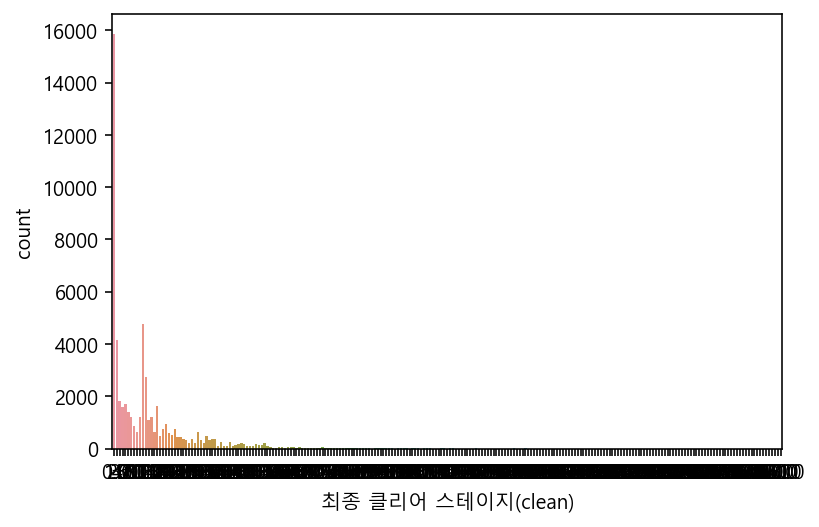

In [18]:
# 또는, (countplot" 특정 문자 데이터의 빈도수, barplot 은 집단 간의 통계량을 비교 )

sns.countplot(data = data, x = '최종 클리어 스테이지(clean)')

**6. 최종 도달 스테이지를 기준으로 "스테이지 구분" 이라는 변수를 생성해주세요.**

최종스테이지 기준으로 아래와 같이 구분
* 0 : 0
* 1~5 : 1~5
* 6~9 : 6~9
* 10~14 : 10~14
* 15~19 : 15~19
* 20~ : 20~




In [21]:
def func2(x):
    if x > 20:
        return '20 초과'
    elif x >= 15:
        return '15~20'
    elif x >= 10:
        return '10~14'
    elif x >= 6:
        return '6~9'
    elif x >= 1:
        return '1~5'
    else:
        return '0'

data['스테이지 구분'] = data['최종 클리어 스테이지(clean)'].apply(func2)

In [22]:
data['스테이지 구분'].value_counts()

0        15842
1~5      10636
10~14    10476
20 초과    10011
15~20     4926
6~9       3918
Name: 스테이지 구분, dtype: int64

**7. 위에서 생성한 "스테이지 구분" 별 유저수와 비중(%)을 계산해주세요.**

In [25]:
# 비중 계산을 위해 테이블을 하나 더 반들어 부자
data_stage_cate = data.pivot_table(index = '스테이지 구분', values = 'count', aggfunc='sum').reset_index()

data_stage_cate['rate'] = data_stage_cate['count'] / len(data)
data_stage_cate

,스테이지 구분,count,rate
0,0,15842,0.283861
1,10~14,10476,0.187712
2,15~20,4926,0.088265
3,1~5,10636,0.190579
4,20 초과,10011,0.179380
5,6~9,3918,0.070204


## 구매지표 분석

가입 당일 과금하며 게임에 몰입하는 유저들은 얼마나 있는지, 구매한다면 어떤 상품을 주로 구매하고 있는지 살펴보려고 합니다.

**필요한 컬럼**

* 21: 구매한 상품명
* 22: 구매 횟수


**8. 구매한 경우 1 구매하지 않은 경우 0 으로 나타나는 "구매여부"라는 변수를 생성하고, 전체 구매유저수와 구매하지 않은 유저수를 각각 계산해주세요.**

(구매유저 = 구매횟수가 1 이상인 유저)

**9. "구매 여부" 별 최종 도달 스테이지 분포를 Boxplot으로 표현해주세요.**

**10. "스테이지 구분"별 구매유저수와 평균 구매횟수를 계산해주세요.**

**11. 상품별 구매유저수를 계산하고, 구매유저수가 가장 많은 상품부터 순서대로 나열해주세요.**

## 재화 지표 분석

**"버블2"**에서 사용되는 여러 재화들 중 두 가지 중요한 재화에 대해 살펴보겠습니다.

먼저, **"루비"**는 게임 내 메인 캐시역할을 하는 재화입니다. 주로 과금을 통해 획득할 수 있고, 가끔 보상이나 버디 스킬을 통해 획득할 수 있습니다.
루비 사용처를 파악하면 유저들이 어떤 측면에서 과금 니즈를 느끼는지 확인할 수 있습니다.

그리고 **"불꽃"**이라는 재화는 게임 내 메인 스테이지에 입장하기 위한 열쇠 역할을 하는 재화입니다. 불꽃을 모두 사용하면 시간이 지남에 따라 최대 5개까지 자동으로 충전되고, 그 외 필요한 불꽃은 루비로 구매할 수 있고, 이벤트를 통해서도 가끔 획득할 수 있습니다.

**필요한 컬럼**

* 13: 획득한 불꽃 총 개수
* 14: 사용한 불꽃 총 개수
* 15: 코인 교환에 사용한 루비량
* 16: 버디 슬롯 개방에 사용한 루비량
* 17: 에피소드 오픈에 사용한 루비량
* 18: 불꽃 충전에 사용한 루비량
* 19: 버디 뽑기(가챠)에 사용한 루비량
* 20: 스테이지 플레이에 필요한 아이템 구매에 사용한 루비량



**12. 루비의 각 소비처(컬럼 15~20번) 별 루비를 사용한 유저수, 평균 사용량을 계산해주세요.**

In [26]:
data.columns

Index(['os 타입', '국가', '로그인 타입', 'D+1일차 접속여부', 'D+3일차 접속여부', 'D+5일차 접속여부',
       'D+7일차 접속여부', 'D+9일차 접속여부', 'D+11일차 접속여부', 'D+14일차 접속여부', '최종 클리어 스테이지',
       '마지막으로 도전한 스테이지', '획득한 불꽃 총 개수', '사용한 불꽃 총 개수', '코인 교환에 사용한 루비량',
       '버디 슬롯 개방에 사용한 루비량', '에피소드 오픈에 사용한 루비량', '불꽃 충전에 사용한 루비량',
       '버디 뽑기(가챠)에 사용한 루비량', '스테이지 플레이에 필요한 아이템 구매에 사용한 루비량', '구매한 상품명',
       '구매 횟수', 'count', '최종 클리어 스테이지(clean)', '스테이지 구분'],
      dtype='object')

In [29]:
ruby_list = ['획득한 불꽃 총 개수', '사용한 불꽃 총 개수', '코인 교환에 사용한 루비량',
       '버디 슬롯 개방에 사용한 루비량', '에피소드 오픈에 사용한 루비량', '불꽃 충전에 사용한 루비량',
       '버디 뽑기(가챠)에 사용한 루비량', '스테이지 플레이에 필요한 아이템 구매에 사용한 루비량']
data[ruby_list]

,획득한 불꽃 총 개수,사용한 불꽃 총 개수,코인 교환에 사용한 루비량,버디 슬롯 개방에 사용한 루비량,에피소드 오픈에 사용한 루비량,불꽃 충전에 사용한 루비량,버디 뽑기(가챠)에 사용한 루비량,스테이지 플레이에 필요한 아이템 구매에 사용한 루비량
0,41,41,0,0,0,0,0,32
1,12,8,0,0,0,0,0,0
2,17,17,0,0,0,0,0,6
3,5,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
55804,7,7,0,0,0,0,0,0
55805,16,11,0,0,0,0,0,0
55806,22,18,0,0,0,0,0,0
55807,14,9,0,0,0,0,0,0


In [35]:
data_melt = data[ruby_list].melt(id_vars = ['획득한 불꽃 총 개수', '사용한 불꽃 총 개수'])
data_melt2 = data_melt.rename(columns = {'variable': '사용처', 'value': '사용량'})
data_melt2

,획득한 불꽃 총 개수,사용한 불꽃 총 개수,사용처,사용량
0,41,41,코인 교환에 사용한 루비량,0
1,12,8,코인 교환에 사용한 루비량,0
2,17,17,코인 교환에 사용한 루비량,0
3,5,0,코인 교환에 사용한 루비량,0
4,0,0,코인 교환에 사용한 루비량,0
...,...,...,...,...
334849,7,7,스테이지 플레이에 필요한 아이템 구매에 사용한 루비량,0
334850,16,11,스테이지 플레이에 필요한 아이템 구매에 사용한 루비량,0
334851,22,18,스테이지 플레이에 필요한 아이템 구매에 사용한 루비량,0
334852,14,9,스테이지 플레이에 필요한 아이템 구매에 사용한 루비량,0


In [36]:
data_melt2.pivot_table(index = '사용처', values = '사용량')

,사용량
사용처,
버디 뽑기(가챠)에 사용한 루비량,1.369672
버디 슬롯 개방에 사용한 루비량,0.210719
불꽃 충전에 사용한 루비량,0.460678
스테이지 플레이에 필요한 아이템 구매에 사용한 루비량,1.933667
에피소드 오픈에 사용한 루비량,0.002580
코인 교환에 사용한 루비량,0.019889


In [44]:
# <사용한 유저 수>

# 항목별로 루비 사용한 적이 있다면1, 없다면 0 으로 라벨링하여

def func3(x):
    if x != 0:
        return 1
    else:
        return 0

data['코인교환 사용여부'] = data['코인 교환에 사용한 루비량'].apply(func3)
data['코인교환 사용여부'].value_counts()
data

,os 타입,국가,로그인 타입,D+1일차 접속여부,D+3일차 접속여부,D+5일차 접속여부,D+7일차 접속여부,D+9일차 접속여부,D+11일차 접속여부,D+14일차 접속여부,최종 클리어 스테이지,마지막으로 도전한 스테이지,획득한 불꽃 총 개수,사용한 불꽃 총 개수,코인 교환에 사용한 루비량,버디 슬롯 개방에 사용한 루비량,에피소드 오픈에 사용한 루비량,불꽃 충전에 사용한 루비량,버디 뽑기(가챠)에 사용한 루비량,스테이지 플레이에 필요한 아이템 구매에 사용한 루비량,구매한 상품명,구매 횟수,count,최종 클리어 스테이지(clean),스테이지 구분,코인교환 사용여부
0,Android,JP,LINE,0,0,0,0,0,0,0,29.0,30,41,41,0,0,0,0,0,32,NaN,NaN,1,29.0,20 초과,0
1,Android,TH,LINE,1,0,0,0,0,0,0,7.0,7,12,8,0,0,0,0,0,0,NaN,NaN,1,7.0,6~9,0
2,iOS,TW,LINE,1,1,1,1,1,1,1,12.0,13,17,17,0,0,0,0,0,6,NaN,NaN,1,12.0,10~14,0
3,iOS,TW,LINE,0,0,0,0,0,0,0,NaN,0,5,0,0,0,0,0,0,0,NaN,NaN,1,0.0,0,0
4,iOS,TW,LINE,0,0,0,0,0,0,0,10.0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,10.0,10~14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55804,iOS,TW,Guest,1,0,0,0,0,0,0,2.0,3,7,7,0,0,0,0,0,0,NaN,NaN,1,2.0,1~5,0
55805,Android,TH,LINE,1,1,0,1,1,1,1,14.0,11,16,11,0,0,0,0,0,0,NaN,NaN,1,14.0,10~14,0
55806,Android,JP,LINE,1,1,1,0,0,1,0,13.0,13,22,18,0,0,0,0,0,0,NaN,NaN,1,13.0,10~14,0
55807,iOS,TW,Guest,1,1,0,0,0,0,0,9.0,9,14,9,0,0,0,0,0,0,NaN,NaN,1,9.0,6~9,0


In [46]:
# 모든 항목에 대해 이 함수 적용,( for문 또는 melt 이용)
# 그럼 각각의 소비처에 대한 사용 유저수 파악 가능

data['바디슬롯 개방여부'] = data['버디 슬롯 개방에 사용한 루비량'].apply(func3)
data['바디슬롯 개방여부'].value_counts()

0    55466
1      343
Name: 바디슬롯 개방여부, dtype: int64

**13. "스테이지 구분"별 루비의 각 소비처별로 루비를 사용한 유저수, 평균 사용량을 계산해주세요.**

**14. "스테이지 구분" 및 "구매여부"에 따라 루비의 각 소비처별로 루비를 사용한 유저수, 평균 사용량을 각각 계산해주세요.**

"스테이지 구분"이 row, "구매여부"가 column이 되도록 만들어주세요.

**15. "스테이지 구분" 별 불꽃 평균 사용량 분포를 그래프로 표현해주세요.**

**16. "스테이지 구분" 별 획득한 불꽃을 모두 다 사용한 유저수를 계산해주세요.**

**17. "스테이지 구분" 별 획득한 불꽃을 모두 다 사용한 유저 중 루비로 불꽃을 충전한 유저수를 계산해주세요.**